In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
%store -r all_tweets

**Keyword frequency and sentiment frequency analysis**

In [4]:
#defiine a function to find out the keyword for each tweet
def Keywords(x):
    if 'trump' in x and 'biden' not in x:
        return "'trump'"
    if 'biden' in x and 'trump' not in x:
        return "'biden'"
    if 'trump' in x and 'biden' in x:
        return "'trump' and 'biden'"
    if 'trump' not in x and 'biden' not in x:
        return "no 'trump' or 'biden'"

In [5]:
#create a column 'keyword' to label the keyword for each tweet
all_tweets['keyword'] =  all_tweets['token'].map(lambda x: Keywords(x))

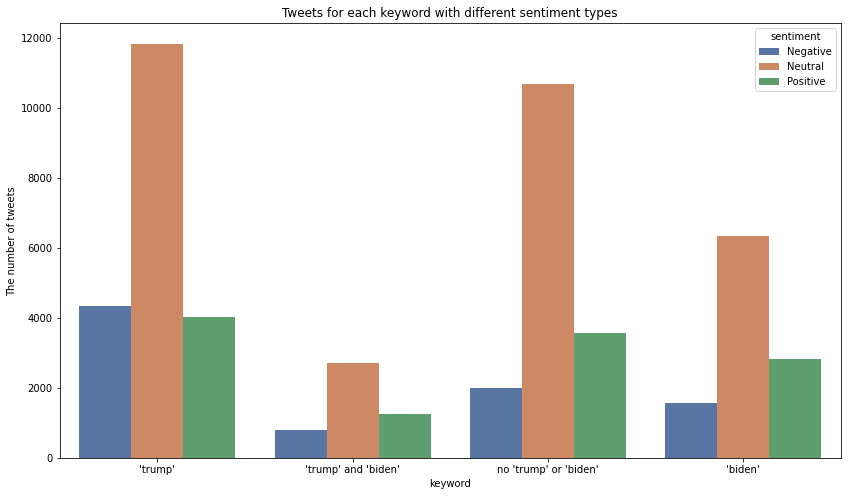

In [10]:
#visualization
plt.figure(figsize=(14,8))

sns.countplot(data = all_tweets, x = 'keyword' , hue = 'sentiment', palette = "deep")
#sns.color_palette("pastel")
#plt.legend(labels=[])
plt.ylabel("The number of tweets")
#plt.set_cmap("viridis")
plt.title("Tweets for each keyword with different sentiment types")
plt.savefig("plots/keywords and sentiment type.jpg")

**How sentiments varied across time?**

In [11]:

emotion_fluctuation_2020 = all_tweets[['date','sentiment']]
#sort the tweets in a ascending order
emotion_fluctuation_2020.sort_values(by = 'date', ascending = True, inplace = True)
emotion_fluctuation_2020.head(3)

/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,date,sentiment
0,2020-10-24,Negative
39821,2020-10-24,Neutral
39820,2020-10-24,Neutral


In [12]:
#convert datetime column to date
emotion_fluctuation_2020['date'] = pd.to_datetime(emotion_fluctuation_2020['date']).dt.date

/var/folders/qm/j2nyw_6j7272_3cq86kpw75r0000gn/T/ipykernel_19383/3910137204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotion_fluctuation_2020['date'] = pd.to_datetime(emotion_fluctuation_2020['date']).dt.date


In [13]:
#prepare for counting sentiments 
emotion_fluctuation_2020['count'] = 1
emotion_fluctuation_2020.reset_index(inplace=True)
emotion_fluctuation_2020.head(3)

/var/folders/qm/j2nyw_6j7272_3cq86kpw75r0000gn/T/ipykernel_19383/2692726054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotion_fluctuation_2020['count'] = 1


,index,date,sentiment,count
0,0,2020-10-24,Negative,1
1,39821,2020-10-24,Neutral,1
2,39820,2020-10-24,Neutral,1


In [15]:
#find out the index of the first tweet on 2021.1.6
import datetime
Jan_emotion = emotion_fluctuation_2020[emotion_fluctuation_2020['date']==datetime.date(2021,1,6)]
pos = Jan_emotion.index[0]
pos

49493

In [16]:
#the number of sentiment
Jan_emotion = Jan_emotion.groupby('sentiment').sum().reset_index()
Jan_emotion.drop(columns = ['index'],inplace=True)
Jan_emotion

,sentiment,count
0,Negative,612
1,Neutral,1430
2,Positive,380


In [17]:
emotion_series_2020 = emotion_fluctuation_2020.iloc[:pos, :]
emotion_series_2020.drop(columns=['index'],inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
emotion_series_2020 = emotion_series_2020.groupby(['date','sentiment']).sum().reset_index()
emotion_series_2020.head()

,date,sentiment,count
0,2020-10-24,Negative,383
1,2020-10-24,Neutral,1400
2,2020-10-24,Positive,515
3,2020-10-25,Negative,341
4,2020-10-25,Neutral,1200


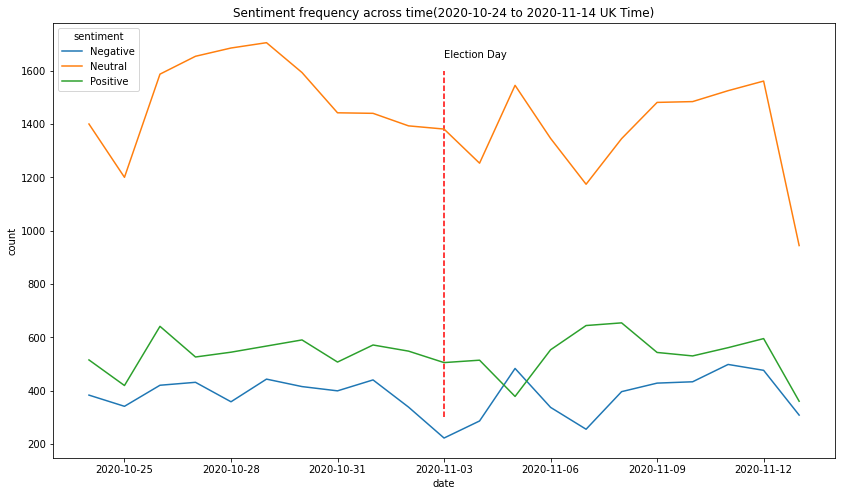

In [19]:
#Visualization for time series of sentiment frequency
import matplotlib.dates as mdates
from datetime import datetime
election_day = '2020-11-03'
convert = datetime.strptime(election_day,'%Y-%m-%d')
plt.figure(figsize=(14,8))
plt.title('Sentiment frequency across time(2020-10-24 to 2020-11-14 UK Time)')
sns.lineplot(x = 'date', y = 'count', hue = 'sentiment', data = emotion_series_2020)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.vlines(convert, 300, 1600,color="red", linestyle="dashed")
plt.text(convert,1650,'Election Day')
plt.savefig('plots/Sentiment frequency across time.jpg')

In [20]:
import datetime
tweets_2020 = all_tweets
tweets_2020['date'] = pd.to_datetime(all_tweets['date']).dt.date
tweets_2020 = tweets_2020[tweets_2020['date']<datetime.date(2021,1,6)]
tweets_2020.head(3)

,index,date,tweet,language,user_id_str,username,docs,lemmatization,s_token,token,vader_tweets,sentiment,keyword
0,0.0,2020-10-24,chikooslim i was thinking that since it was t...,en,18491914,slattfri,"( , chikooslim, i, was, thinking, that, since,...",chikooslim I be think that since it be the d...,"[chikooslim, I, be, think, that, since, it, be...","[chikooslim, I, think, since, daughter, refuse...",chikooslim I think since daughter refuse I ima...,Negative,'trump'
1,1.0,2020-10-24,he s been saying that for four years alllies...,en,46384399,francesmiddlet2,"(he, s, been, saying, that, for, four, years, ...",he s be say that for four year alllie tru...,"[he, s, be, say, that, for, four, year, alllie...","[say, four, year, alllie, trumplie, time, narc...",say four year alllie trumplie time narcissist ...,Neutral,'trump'
2,2.0,2020-10-24,incredibly thought provoking article make sur...,en,2902130034,mfly1971,"(incredibly, thought, provoking, article, , m...",incredibly think provoke article make sure y...,"[incredibly, think, provoke, article, make, su...","[incredibly, think, provoke, article, make, su...",incredibly think provoke article make sure rea...,Neutral,'trump'


In [21]:
pos = len(tweets_2020)
pos

49493

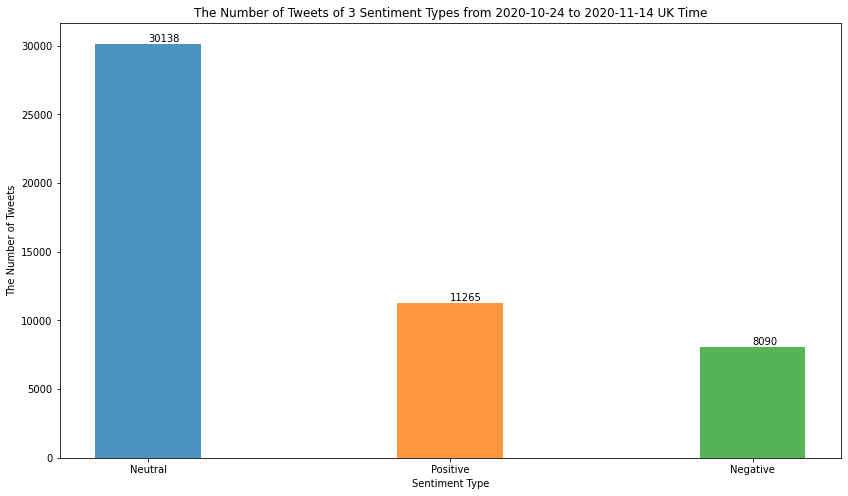

In [22]:
count_sentiment = tweets_2020['sentiment'].value_counts()
plt.figure(figsize=(14,8))
x = np.arange(3)+1
y = np.array(list(count_sentiment))
xticks = list(count_sentiment.index)
#ax = count_sentiment.plot(kind='bar', label='index', color=['C0', 'C1', 'C2'])
plt.bar(x,y,width = 0.35,align='center',color = ['C0','C1','C2'],alpha=0.8)
plt.xticks(x, xticks)
plt.xlabel('Sentiment Type')
plt.ylabel('The Number of Tweets')
plt.title('The Number of Tweets of 3 Sentiment Types from 2020-10-24 to 2020-11-14 UK Time')
for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.0f' % b, va= 'bottom',fontsize=10)
plt.savefig("plots/sentiment frequency bar plot 2020.jpg")
plt.show()

In [23]:
#sentiment frequency on vote count day 2021-01-06
import datetime
tweets_2021 = all_tweets
tweets_2021['date'] = pd.to_datetime(all_tweets['date']).dt.date
tweets_2021 = tweets_2021[tweets_2021['date']==datetime.date(2021,1,6)]
tweets_2021.head(3)

,index,date,tweet,language,user_id_str,username,docs,lemmatization,s_token,token,vader_tweets,sentiment,keyword
19526,21848.0,2021-01-06,what s their hurry s thanks joebiden whit...,en,1431906776,JosiePhelix,"(what, s, their, hurry, , s, thanks, , joeb...",what s their hurry s thank joebiden wh...,"[what, s, their, hurry, s, thank, joebiden, wh...","[hurry, thank, joebiden, white, fascist, privi...",hurry thank joebiden white fascist privilege n...,Negative,'trump'
19527,21849.0,2021-01-06,blm protesters were beat and arrested for def...,en,51883389,EmilyEuans,"(blm, protesters, were, beat, , and, arrested...",blm protester be beat and arrest for defy cu...,"[blm, protester, be, beat, and, arrest, for, d...","[blm, protester, beat, arrest, defy, curfew, r...",blm protester beat arrest defy curfew rioting ...,Negative,'trump'
19528,21850.0,2021-01-06,trump waking up today,en,1016356135,littlepinkboots,"(trump, waking, up, today, )",trump wake up today,"[trump, wake, up, today]","[trump, wake, today]",trump wake today,Neutral,'trump'


In [24]:
tweets_2021['count'] = 1
tweets_2021 = tweets_2021[['date','sentiment','count']]
tweets_2021.reset_index(inplace=True)
tweets_2021.drop(columns=['index'])
tweets_2021.head(3)

/var/folders/qm/j2nyw_6j7272_3cq86kpw75r0000gn/T/ipykernel_19383/2355660017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2021['count'] = 1


,index,date,sentiment,count
0,19526,2021-01-06,Negative,1
1,19527,2021-01-06,Negative,1
2,19528,2021-01-06,Neutral,1


In [25]:
Jan_emotion = tweets_2021.groupby('sentiment').sum().reset_index()
Jan_emotion.drop(columns = ['index'],inplace=True)
Jan_emotion

,sentiment,count
0,Negative,612
1,Neutral,1430
2,Positive,380


[Text(0, 0, '612'), Text(0, 0, '1430'), Text(0, 0, '380')]

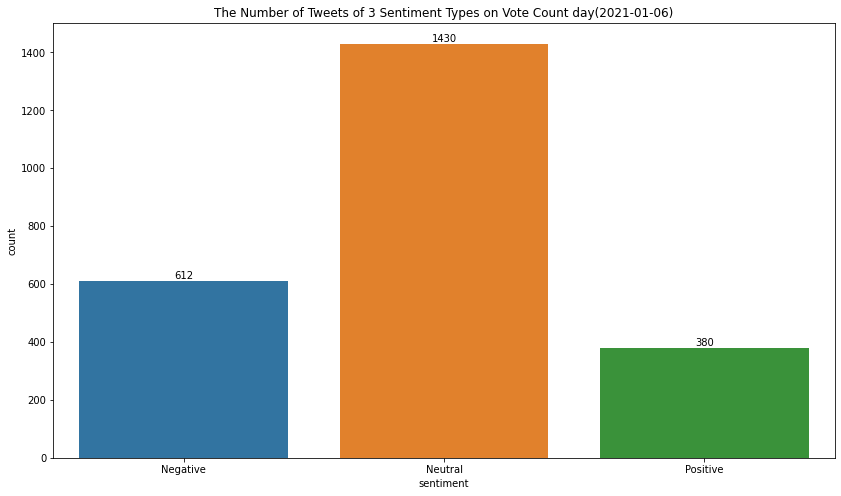

In [43]:
#Visualization for sentiment frequency on vote count day(2021.01.06)
plt.figure(figsize=(14,8))
plt.title('The Number of Tweets of 3 Sentiment Types on Vote Count day(2021-01-06)')
ax = sns.barplot(x='sentiment',y='count',data=Jan_emotion)
ax.bar_label(ax.containers[0])
#plt.savefig('plots/Sentiment frequency on 2021-01-06.jpg')

**Active Users Analysis**

In [27]:
#check how many users involved in this analysis and how many tweets they posted
users = pd.DataFrame(all_tweets['user_id_str'].value_counts())
users.head()

,user_id_str
37711670,69
2737655636,34
1318069609,34
1017141344559685632,31
1320798983640567808,30


In [28]:
#update the columns
users = users.reset_index()
users.columns = ['user_id_str','frequency']
users.head(3)

,user_id_str,frequency
0,37711670,69
1,2737655636,34
2,1318069609,34


In [29]:
#If a user posted 20 or above tweets, he/she is seen as an active user
active_users = users[users['frequency']>=20]
active_users.head()

,user_id_str,frequency
0,37711670,69
1,2737655636,34
2,1318069609,34
3,1017141344559685632,31
4,1320798983640567808,30


In [30]:
#check what is the percentage of the active users towards total users
active_user_proportion = (len(active_users)/len(users))*100
print("The number of users in total is ",(len(users)))
print("The number of active users(users who post more than 20 tweets) is ",(len(active_users)))
print("The proportion of active users is {:.2f}%".format(active_user_proportion))


The number of users in total is  44622
The number of active users(users who post more than 20 tweets) is  19
The proportion of active users is 0.04%


In [31]:
#link the active_users_tweets and all_tweets to find out the keyword and sentiment for each tweet
active_users_tweets = pd.merge(all_tweets, active_users, on = 'user_id_str')
active_users_tweets.head()

,index,date,tweet,language,user_id_str,username,docs,lemmatization,s_token,token,vader_tweets,sentiment,keyword,frequency
0,254.0,2020-10-24,trump and biden battle for swing states in fin...,en,3549429319,k29664911,"(trump, and, biden, battle, for, swing, states...",trump and biden battle for swing state in fina...,"[trump, and, biden, battle, for, swing, state,...","[trump, biden, battle, swing, state, final, st...",trump biden battle swing state final stretch e...,Neutral,'trump' and 'biden',20
1,1242.0,2020-10-25,trump campaign requests nevada court halt earl...,en,3549429319,k29664911,"(trump, campaign, requests, nevada, court, hal...",trump campaign request nevada court halt early...,"[trump, campaign, request, nevada, court, halt...","[trump, campaign, request, nevada, court, halt...",trump campaign request nevada court halt early...,Neutral,'trump',20
2,2119.0,2020-10-26,biden pushes back on trump s attacks in pennsy...,en,3549429319,k29664911,"(biden, pushes, back, on, trump, s, attacks, i...",biden push back on trump s attack in pennsylva...,"[biden, push, back, on, trump, s, attack, in, ...","[biden, push, back, trump, attack, pennsylvani...",biden push back trump attack pennsylvania I el...,Neutral,'trump' and 'biden',20
3,2135.0,2020-10-26,trump s taxes election and abortion cases awa...,en,3549429319,k29664911,"(trump, s, taxes, , election, and, abortion, ...",trump s taxis election and abortion case awa...,"[trump, s, taxis, election, and, abortion, cas...","[trump, taxis, election, abortion, case, await...",trump taxis election abortion case await amy c...,Neutral,'trump',20
4,3398.0,2020-10-27,live trump holds campaign rally in wisconsin ...,en,3549429319,k29664911,"(live, , trump, holds, campaign, rally, in, w...",live trump hold campaign rally in wisconsin ...,"[live, trump, hold, campaign, rally, in, wisco...","[live, trump, hold, campaign, rally, wisconsin...",live trump hold campaign rally wisconsin nbc n...,Neutral,'trump',20


In [32]:
#drop the redundant column
active_users_tweets = active_users_tweets.drop(columns=['frequency'])

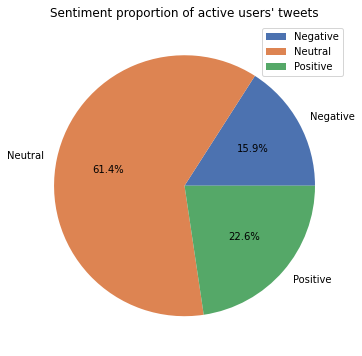

In [33]:
active_users_tweets['count'] = 1
colors = sns.color_palette('deep')
data = list(active_users_tweets.groupby('sentiment').sum()['count'])
labels = ['Negative','Neutral','Positive']
plt.figure(figsize=(6,6))
plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
plt.legend()
plt.title("Sentiment proportion of active users' tweets")
plt.savefig("plots/sentiment of active users tweets.jpg")

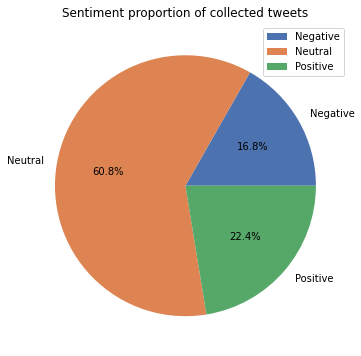

In [46]:
all_tweets['count'] = 1
colors = sns.color_palette('deep')
data = list(all_tweets.groupby('sentiment').sum()['count'])
labels = ['Negative','Neutral','Positive']
plt.figure(figsize=(6,6))
plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
plt.legend()
plt.title("Sentiment proportion of collected tweets")
plt.savefig('plots/Sentiment proportion of collected tweets.jpg')

In [34]:
%store active_users_tweets

Stored 'active_users_tweets' (DataFrame)


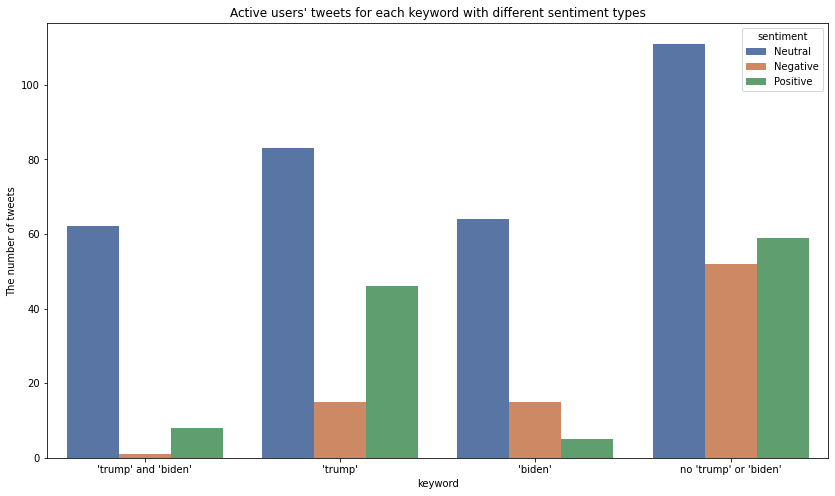

In [35]:
plt.figure(figsize=(14,8))

sns.countplot(data = active_users_tweets, x = 'keyword' , hue = 'sentiment', palette = "deep")
#sns.color_palette("pastel")
#plt.legend(labels=[])
plt.ylabel("The number of tweets")
#plt.set_cmap("viridis")
plt.title("Active users' tweets for each keyword with different sentiment types")
plt.savefig('plots/Active users tweets keyword and sentiment frequency.jpg')